In [4]:
import numpy as np
import pandas as pd
import wave
import math
import matplotlib.pyplot as plt

import config

from data import load_sample_data, load_event_data, downsample, get_time_interval
from data_merge import merge_samples_events
from data_transform import get_event_sequences

In [5]:

FILE_PATH = "../data/DoubleBlinkLR_Alex"

DOWNSAMPLE_RATE = 100

EVENT_LENGTH = 3 # length of a given event sequence in seconds

EVENT_START = -0.25
EVENT_END = 0.25


In [6]:
samples_df = load_sample_data(FILE_PATH)
samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)
events_df = load_event_data(FILE_PATH)

merge_df = merge_samples_events(samples_df, events_df, EVENT_START, EVENT_END)

# time_start = 30
# time_end = 60
# merge_df = get_time_interval(merge_df, time_start, time_end)
# print(merge_df)

seq_data, seq_labels = get_event_sequences(merge_df, event_length=EVENT_LENGTH)

print(seq_data.shape, seq_data)
print(seq_labels.shape, seq_labels)




Sample rate: 10000 samples/sec
Sample size: 2 bytes
No. channels: 1
Transforming data into individual sequences...
Transformed 18482 sequences of size 300
(18482, 300) [[ -105.98   129.44   -33.44 ...   176.29   155.79    61.92]
 [  129.44   -33.44   116.55 ...   155.79    61.92    76.39]
 [  -33.44   116.55  -125.85 ...    61.92    76.39    -7.94]
 ...
 [ -335.87   -44.54  -233.16 ... -2223.95 -1982.8  -1222.54]
 [  -44.54  -233.16   -38.21 ... -1982.8  -1222.54 -1108.52]
 [ -233.16   -38.21  -286.27 ... -1222.54 -1108.52  -457.56]]
(18482,) [-1 -1 -1 ... -1 -1 -1]


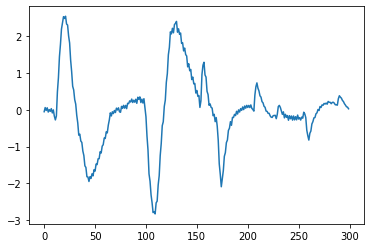

In [7]:
# Transform sequence data

for i in range(len(seq_data)):
    seq_data[i] /= seq_data[i].std()


plt.plot(seq_data[0])

[0 0 0 ... 0 0 0]
18482
0 14782 0.7998052158857266
1 1900 0.10280272697759983
2 1800 0.09739205713667352


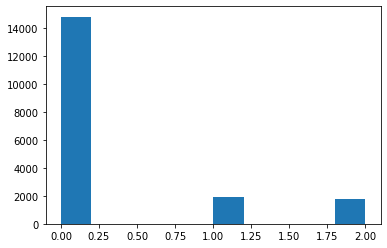

In [8]:
# Transform sequence labels

# 0 for None, 1 for Left, 2 for Right
seq_labels[seq_labels == -1] = 0
print(seq_labels)

plt.hist(seq_labels)

print(len(seq_labels))
print(0, sum(seq_labels == 0), sum(seq_labels == 0)/len(seq_labels))
print(1, sum(seq_labels == 1), sum(seq_labels == 1)/len(seq_labels))
print(2, sum(seq_labels == 2), sum(seq_labels == 2)/len(seq_labels))


In [9]:
# Randomly arrange data
# Be careful with this (best to test never-before-seen entire events rather than sequences)

train_n = round(len(seq_data)*0.7)
test_n = len(seq_data) - train_n
print(train_n, test_n)

train_seq, test_seq = seq_data[:train_n], seq_data[train_n:]
train_labels, test_labels = seq_labels[:train_n], seq_labels[train_n:]

print(train_seq.shape, train_labels.shape, train_labels)
print(test_seq.shape, test_labels.shape, test_labels)

# Print some labels examples
# for i in range(100, len(test_labels), 500):
#     print(i, test_labels[i])

12937 5545
(12937, 300) (12937,) [0 0 0 ... 0 0 0]
(5545, 300) (5545,) [0 0 0 ... 0 0 0]


In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.8, input_shape=(300,)),
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 300)               0         
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 16)                4816      
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________


In [14]:
import tensorflow as tf

# 85-86% after ~50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.9, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 300)               0         
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                9632      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [130]:
import tensorflow as tf

# 1000 epochs 86-87% accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.95, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 300)               0         
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_52 (Dense)            (None, 32)                9632      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [143]:
import tensorflow as tf

#
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.95, input_shape=(300,)),
    
    tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 300)               0         
                                                                 
 dropout_26 (Dropout)        (None, 300)               0         
                                                                 
 dense_65 (Dense)            (None, 64)                19264     
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,443
Trainable params: 21,443
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

EPOCHS = 50

history = model.fit(
    train_seq,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_seq, test_labels)
#     batch_size=16
)

Epoch 1/50
405/405 [==============================] - 1s 1ms/step - loss: 0.4368 - accuracy: 0.8327 - val_loss: 0.3996 - val_accuracy: 0.8476
Epoch 2/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8274 - val_loss: 0.4135 - val_accuracy: 0.8399
Epoch 3/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8299 - val_loss: 0.4150 - val_accuracy: 0.8404
Epoch 4/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8334 - val_loss: 0.4063 - val_accuracy: 0.8442
Epoch 5/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8282 - val_loss: 0.3921 - val_accuracy: 0.8500
Epoch 6/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8323 - val_loss: 0.4042 - val_accuracy: 0.8422
Epoch 7/50
405/405 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8276 - val_loss: 0.4077 - val_accuracy: 0.8465
Epoch 

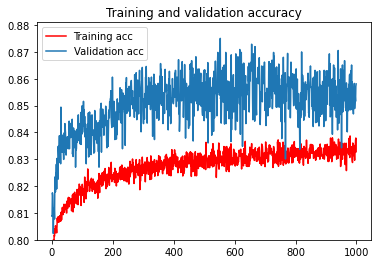

In [145]:
plt.plot(history.history['accuracy'], label='Training acc', color="red")
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim(0.8)
plt.legend()

In [134]:
test_loss, test_acc = model.evaluate(
    test_seq,
    test_labels,
    verbose=2
)

print('\nTest accuracy:', test_acc)

174/174 - 0s - loss: 0.3773 - accuracy: 0.8620 - 118ms/epoch - 681us/step

Test accuracy: 0.8620378971099854


In [19]:
# class_names = ["None", "Left", "Right"]

predictions = model.predict(test_seq)
predictions = tf.nn.softmax(predictions, axis=1)
# print(predictions)

event_pred = np.argmax(predictions, axis=1)
# print(event_pred)

# Rows are "real" labels
# Columns are "predicted" labels
tf.math.confusion_matrix(
    test_labels,
    event_pred
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[4090,  173,  182],
       [ 238,  312,    0],
       [ 237,    0,  313]], dtype=int32)>

[0.7938209  0.7581614  0.7545623  ... 0.90321386 0.89196825 0.88342446]
[0.2018255  0.2377388  0.24200335 ... 0.08223566 0.09694674 0.10749318]
[0.0043536  0.0040998  0.00343434 ... 0.01455051 0.01108503 0.00908232]


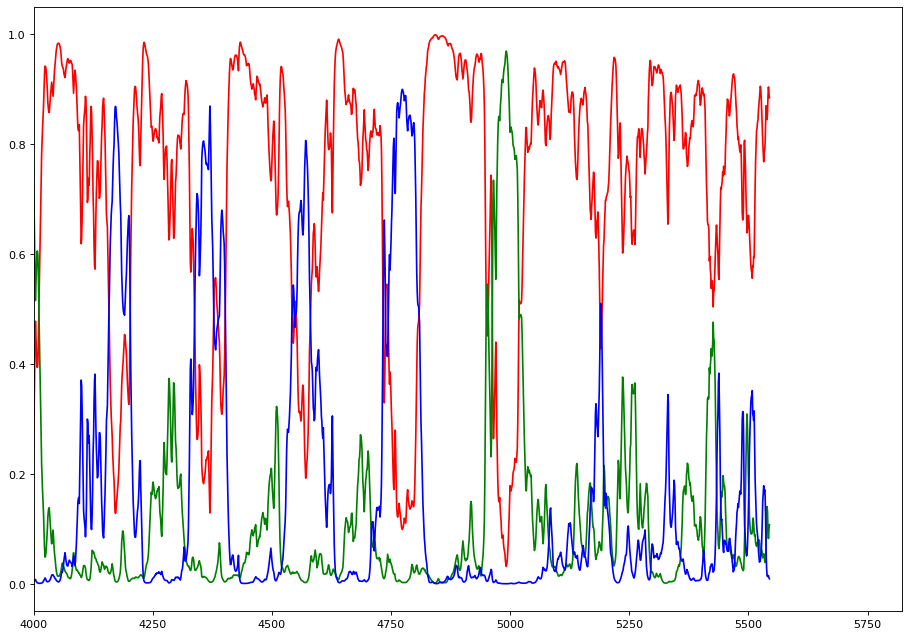

In [42]:
# Plot the predictions alongside the actual ranges
# Looks to be 100% correct at least when deciding Left VS Right
# Mostly just the borders which are wrong (so not really an issue)

# Should add additional check which uses the output of this neural network itself as a feature.
# eg. The ANN needs to output "Left" or "Right" for 90% (or 50%?) of a sequence 0.1 seconds long.

pred_none = np.array([i[0] for i in predictions])
pred_left = np.array([i[1] for i in predictions])
pred_right = np.array([i[2] for i in predictions])

print(pred_none)
print(pred_left)
print(pred_right)


plt.figure(figsize=(14, 10), dpi=80)

plt.plot(pred_none, color="red")
plt.plot(pred_left, color="green")
plt.plot(pred_right, color="blue")

plt.xlim(4000)

plt.show()




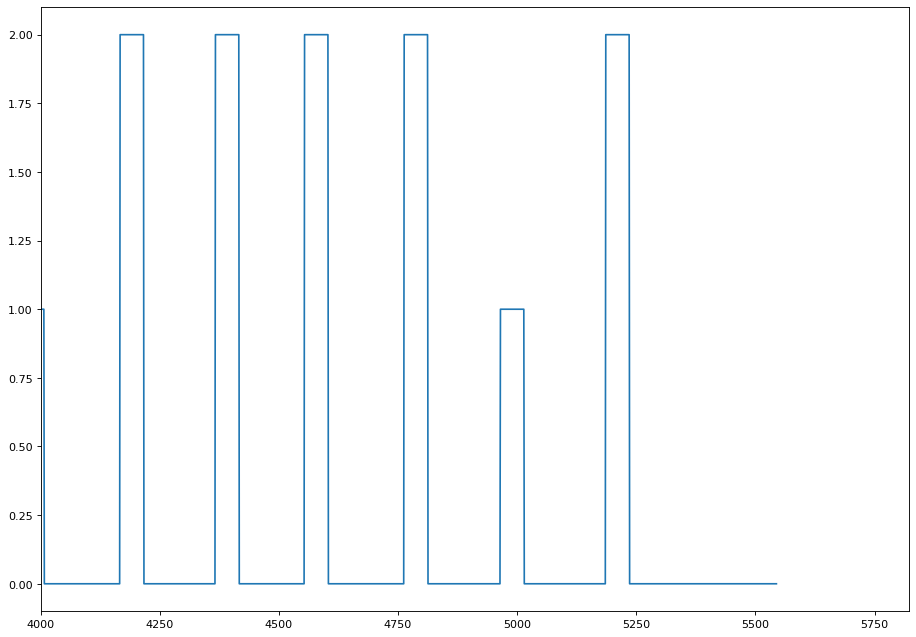

In [43]:
# True events

plt.figure(figsize=(14, 10), dpi=80)
plt.plot(test_labels)
plt.xlim(4000)
plt.show()

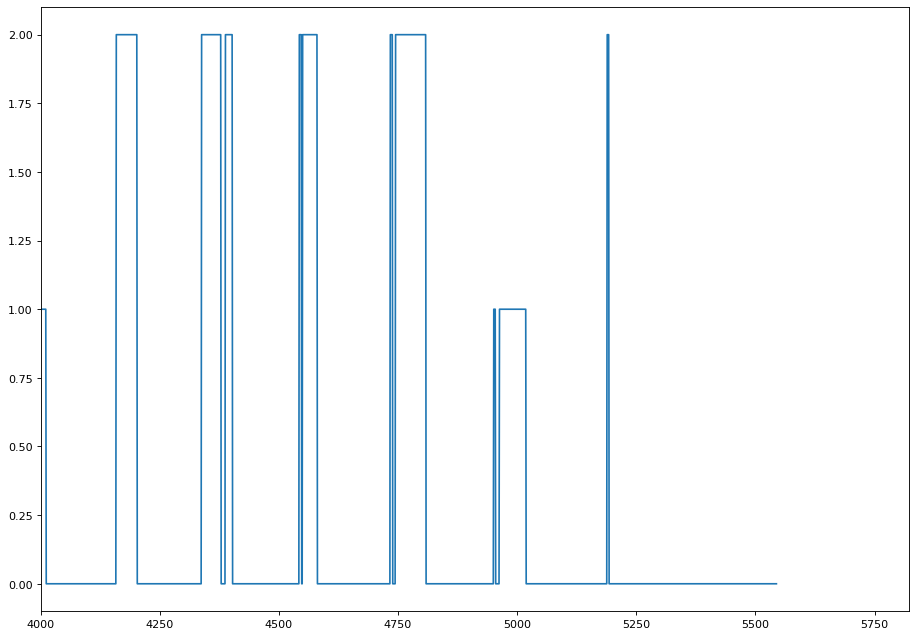

In [44]:
# Final preds

plt.figure(figsize=(14, 10), dpi=80)
plt.plot(event_pred)
plt.xlim(4000)
plt.show()